<a href="https://colab.research.google.com/github/michalis0/DataMining_and_MachineLearning/blob/master/week6/Classification_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining and Machine Learning - Week 6
# Classification (I)

Classification is part of **supervised learning**. The objective is to predict a category (or a label), by training a model on a set of annotated (labelled) samples. The variable to predict is categorical (not numerical as in regression), and its categories are predefined.

For example you can predict whether an email is spam or not spam. Or looking at email advertisements, predict whether a client will click or not on the advert.  

This notebook looks at **binary classifiers** (when the target variable only has 2 classes, like yes or no) and **multi-class classifiers** (when the target variable has more than 2 classes, like low, medium and high income)

Let's look at a concrete first classification task and solve it step by step using Scikit-learn.

In [ ]:
# import required packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

%matplotlib inline
sns.set_style('dark')

##1. Logistic Regression for Binary Classifiers: first simple easy example

To start with, we create our own dataset so that it includes two numerical variables (x1 and x2) and one binary target variable, which only takes two values: 0 and 1.

The goal is to fit a model using the features x1 and x2 to learn when the target variable is 0 and when it is 1.

In [ ]:
sample = [[0.1, 0.2, 0],
          [0.3, 0.05, 0],
          [0.3, 0.2, 0],
          [0.7, 0.65, 1],
          [0.25, 0.3, 0],
          [0.85, 0.55, 1],
          [0.1, 0.45, 0],
          [0.9, 0.85, 1],
          [0.95, 0.55, 1],
          [0.8, 0.8, 1]
          ]
df = pd.DataFrame(sample, columns=['x1', 'x2', 'target'])
df

,x1,x2,target
0,0.10,0.20,0
1,0.30,0.05,0
2,0.30,0.20,0
3,0.70,0.65,1
4,0.25,0.30,0
5,0.85,0.55,1
6,0.10,0.45,0
7,0.90,0.85,1
8,0.95,0.55,1
9,0.80,0.80,1


###Plot `x1` and `x2` according to `target`

The idea is to get a graphical representation of the problem at hand using x1 and x2 as the two dimension of a scatter plot and varying the color of the resulting scatter points by the target vairable (which shows either 0 or 1).

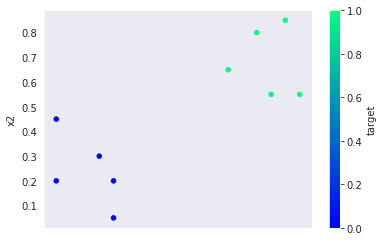

In [ ]:
df.plot.scatter(x='x1', y='x2', c='target', colormap='winter');
# set the (c) color of the map to vary by the "target" feature of the df

We can see there is a clear linear separation between the green scatter points (target=1) and the blue points (target=0). You can easily draw a line that separates the two categories.

This situation is a good candidate for training a logistic regression.

### Logistic Regression and Decision Boundary

We'll do just that below.

In [ ]:
# Set 'X' and 'y'
# Reminder: 'X' will contain our independent features and 'y' will contain our dependent feature

X = df[['x1', 'x2']] # this is our input matrix, it includes our two numerical features

y = df.target # this is our binary target vector, it contains our categorical variable, the labels we'd like to learn

#instantiate the estimator
LR = LogisticRegression()

# fit the estimator to our labelled data (input matrix and target vector)
LR.fit(X, y)

LogisticRegression()

Some results of our simple Logistic Regression model. We will apply the train-test-split in the second example. Here we only have 10 data points.

In [ ]:
LR.coef_ # these are the fitted coefficients for x1 and x2

array([[1.15013435, 0.79371503]])

In [ ]:
LR.intercept_ # this is fitted the intercept

array([-0.96836108])

In [ ]:
LR.predict(X) # these are the model predictions for y given the set of X's

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1])

In [ ]:
LR.predict_proba(X) # for each point in the dataset, these are the predicted probabilities for each class (0 and 1)

array([[0.66699047, 0.33300953],
       [0.6419034 , 0.3580966 ],
       [0.61409959, 0.38590041],
       [0.4127405 , 0.5872595 ],
       [0.60890529, 0.39109471],
       [0.39036068, 0.60963932],
       [0.62156023, 0.37843977],
       [0.32269423, 0.67730577],
       [0.3633601 , 0.6366399 ],
       [0.35738815, 0.64261185]])

In [ ]:
LR.classes_ # these are classes that the model learned to predict for the target vector y

array([0, 1])

How good is this model? One way we could assess goodness of fit is by looking at accuracy.

***Accuracy** is the proportion of data points (from the test set) that the model classifies as correct. We'll come back to see the train-test split later. But for the moment, let's check the accuracy of our model with the code below. Our model seems 100% accurate. That can be because we have not tested it on any unseen labelled data (the test set).

In [ ]:
LR.score(X, y)

1.0

Can we have a nice graphical representation of our simple, easy model?

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


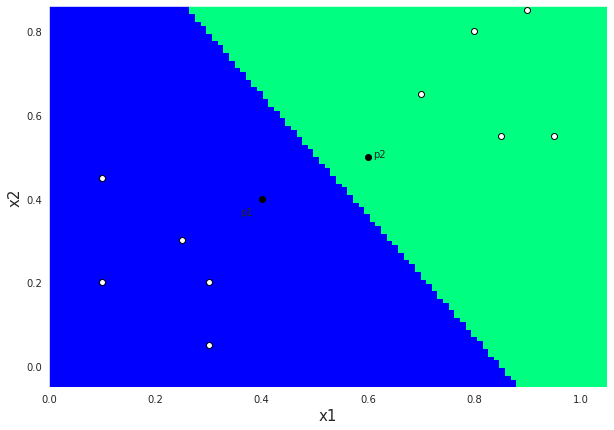

In [ ]:
# here is the decision boundary plot

# create a grid of values bounded by the actual min and max values of x1 and x2
x_min, x_max = X.x1.min()-0.1, X.x1.max() + 0.1
y_min, y_max = X.x2.min()-0.1, X.x2.max() +.01
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# get the predicted target values for the generated grid of values
Z = LR.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# put the result into a pseudocolor plot
plt.figure(1, figsize=(10, 7))
plt.pcolormesh(xx, yy, Z, cmap='winter') # x and y specify the corners, Z specifies the color

# plot the training points
plt.scatter(X.x1, X.x2, edgecolors='k', c='white')

# plot two new unseen points p1 and p2
plt.scatter(0.4, 0.4, c='black') # p1
plt.scatter(0.6, 0.5, c='black') #p2
plt.text(0.36, 0.36, 'p1') # the label of p1
plt.text(0.61, 0.5, 'p2') # the label of p2
plt.xlabel('x1', fontsize=15)
plt.ylabel('x2', fontsize=15);

This pseudo color plot shows the decision boundary for our Logistic Regression classifier. We have seen previously this seems to be a linearly separable problem given the position of the train scatter points on the plot. Now we can see where the model drew the line.

We have also plotted two new "unseen" points: p1 and p2. Given our simple easy model, what target class can we predict for p1 and p2?

### Predictions for two new unseen points

In [ ]:
# Make a dataframe with our two new points p1 and p2 for which we know the x1 and x2 values

new_points = pd.DataFrame([[0.4, 0.4], [0.6, 0.5]], columns=['x1', 'x2'], index=['p1', 'p2'])
new_points

,x1,x2
p1,0.4,0.4
p2,0.6,0.5


In [ ]:
# use our model LR to predict
LR.predict(new_points)

array([0, 1])

Our guess is confirmed, the model predicts p1 to be of label 0 (blue in the decision boundary plot) and p2 to be of label 1 (green).

But with what probability are they of the predicted labels? Remember, they are quite close to the decision boundary, thus the predictions have close to 50-50 probability to be accurate).

In [ ]:
LR.predict_proba(new_points)

array([[0.5475611 , 0.4524389 ],
       [0.47039042, 0.52960958]])

### A few theoretical elements

Logistic Regression gets its name from the function used at its core, the logistic function. Also called the Sigmoid Function, it is used to describe probabilities. The function has an S-shaped curve shown below. It takes any float x and maps it to a probability value between 0 and 1. The function applies this non-linear transformation to x to map it to a probability value.

This is the Sigmoid Function:

$$\frac{1}{1+e^{-x}}$$



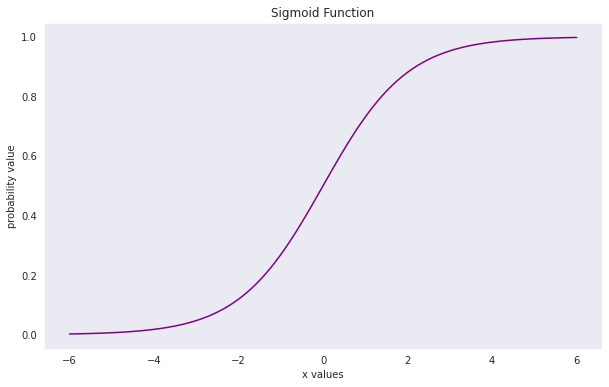

In [ ]:
x = np.linspace(-6, 6, num=100)
plt.figure(figsize=(10,6))
plt.plot(x, (1/(1+np.exp(-x))), c='purple')
plt.title('Sigmoid Function')
plt.xlabel('x values')
plt.ylabel('probability value');

Preparing data for Binary Logistic Regression

Just a reminder of some of the underlying assumptions:

* **Binary target variable**: the model is intended for binary (two-class) classification problems. It predicts the probability of an instance belonging to one of these two classes.
* **Remove noise**: it assumes no error is present in the target variable. Thus you should consider removing misclassified instances and cleaning your data.
* **Linear relationship**: it assumes there is a linear relationship between X and y-probabilities (that the problem is linearly separable). Thus you should consider plotting your data like we have seen above.
* **Fail to converge**: It is possible that the estimation fails to converge and given an error. This can happen if there are many highly correlated inputs in your data or if the data are very sparse (many zero values in the input data). In this case you can set a number for the `max_iter` parameter.


Perhaps we could do better in the example above if we applied some of the improvements we have learned before for regression:
* train-test-split (test our results on a set of unseen data)
* standardisation (when x1 and x2 are on different scales)
* cross-validation (have several test sets)
* regularization (when x1 and x2 are highly correlated; to reduce overfitting)


##2. Logistic Regression to Predict Ad Click

Let's try this out Logistic Regression in a real-world example from Kaggle on Advertising data. The dataset is available online here: https://github.com/michalis0/DataMining_and_MachineLearning/blob/master/week6/data/advertising.csv

It has 1000 rows and 10 features:
* `Daily Time Spent on Site`: consumer time on site in minutes
* `Age`: customer age in years
* `Area Income`: average income of geographical area in which customer resides
* `Daily Internet Usage`: average minutes a day a customer is online
* `Ad Topic Line`: headline of the advertisement
* `City`: city of the customer
* `Male`: takes 1 if customer is male
* `Country`: country of the customer
* `Timestamp`: time at which customer clicked on ad
* `Clicked ad`: 1 if clicked on ad and 0 otherwise.

The goal is the predict whether a customer clicks on an advertisement email using the `Clicked ad` column.

First, load the dataset.

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/michalis0/DataMining_and_MachineLearning/master/week6/data/advertising.csv')
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


Check how variables are encoded.

In [ ]:
data.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

Convert timestamp to date time format.

In [ ]:
data.Timestamp = pd.to_datetime(data.Timestamp, format='%Y-%m-%d')

Encode `country` and `city` as categorical variables using a LabelEncoder (or else you won't be able to use them as features in your model).

The Label Encoder does not assume there is any order within the list of Cities and Countries (they are categorical but not ordinal variables).

In [ ]:
# instantiate encoder
le=LabelEncoder()
# fit_transform on entire dataset
data['city_label'] = pd.Series(le.fit_transform(data.City))


In [ ]:
data.City.head()

0       Wrightburgh
1         West Jodi
2          Davidton
3    West Terrifurt
4      South Manuel
Name: City, dtype: object

In [ ]:
data.city_label.head() # Indeed we see no order

0    961
1    903
2    111
3    939
4    805
Name: city_label, dtype: int64

In [ ]:
# do the same for country
data['country_label'] = pd.Series(le.fit_transform(data.Country))

In [ ]:
data.columns # so we get two new columns 'city_label' and 'country_label'

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad', 'city_label', 'country_label'],
      dtype='object')

There is another encoder we would like to introduce: **Ordinal Encoder**, in which the order of categories counts and can be set.

For this, let's look at the `Age` column and split it just for the purpose of demonstratin into 3 categories: 
*   16 to 25,
*   26 to 40,
*   41 to 61.



In [ ]:
# create a new column age_cat which stores the three groups using list comprehesion

data['age_cat'] = ['26-40' if x>25 and x<=40 
                   else '16-25' if x<=25
                   else '41-61' 
                   for x in data.Age]

In [ ]:
data.age_cat.value_counts()

26-40    613
41-61    289
16-25     98
Name: age_cat, dtype: int64

Let's assume we want to label-encode this column and make sure that the order of the categories respects the order of age. In other words you want the order of the labels is 16-25 =0, 26-40=1, 41-61=2. Then you can use an ordinal encoder in which you can set the order of your categories.

In [ ]:
# instantiate encoder
oe=OrdinalEncoder()

# set the order of your categories
oe.set_params(categories= [['16-25', '26-40', '41-61']])

# fit-transform a dataframe of the categorical age variable
oe_age= oe.fit_transform(data[['age_cat']])

# double check your encoder used the categories in the right order
oe.categories_

[array(['16-25', '26-40', '41-61'], dtype=object)]

This seems to be the right order. Let's have a look at the value counts to be sure. remember, your new column is `oe_age`

In [ ]:
oe_age = pd.DataFrame(oe_age).astype('int')
oe_age.value_counts()

1    613
2    289
0     98
dtype: int64

So now we are sure that the 98 '16-25' observations we had before were encoded with label 0, the 613 '26-40' got lable 1 and so on.

### Quick exploratory data analysis

What is the relationship between these variables? You can use a pairplot from the Seaborn package.

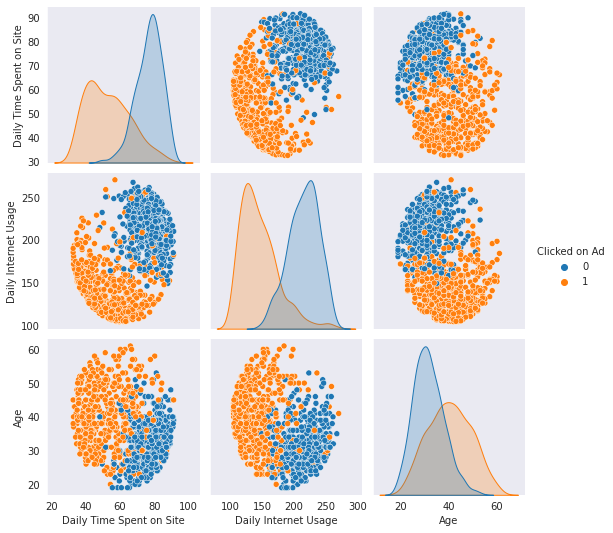

In [39]:
sns.pairplot(data=data, x_vars=['Daily Time Spent on Site', 'Daily Internet Usage', 'Age'], 
             y_vars=['Daily Time Spent on Site', 'Daily Internet Usage', 'Age'], hue='Clicked on Ad')

This problem is not as clear-cut linearly separable as in the previous example, but still it is a good candidate. For comparison we included the similar pairplot for the previous synthetic example. 

For example for age there is a bigger overlap between the "have clicked" and "have not clicked" customers in subplots.

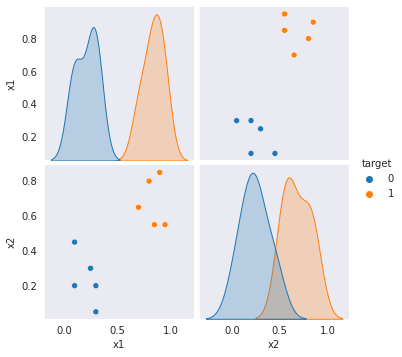

In [40]:
# this was for the previous dataset just for comparison's sake
sns.pairplot(df, hue='target')

### Logistic Regression with Train-Test Split 

Let's try our Logistic Regression on all of the features, using `Clicked on Ad` as our target variable. 

In [41]:
# Select the input and target variables
X = data.drop(['Timestamp', 'Clicked on Ad', 'Ad Topic Line', 'City', 'Country', 'age_cat'], axis=1)

y= data['Clicked on Ad']

In [42]:
X.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,city_label,country_label
0,68.95,35,61833.90,256.09,0,961,215
1,80.23,31,68441.85,193.77,1,903,147


Let's have a look at Y to see how many "have clicked" events we have in our dataset.

In [43]:
y.value_counts()

0    500
1    500
Name: Clicked on Ad, dtype: int64

To get this value expressed as a proportion of all the observations you can use the code below. This gives the frequency of each class.

In [44]:
y.value_counts()/len(y)

0    0.5
1    0.5
Name: Clicked on Ad, dtype: float64

So it's 50-50! Let's apply our train test split using an 80-20 ratio. This shuffles our data so that the resulting samples have nearly the same proportion of "have clicked" occurances.

Also check out the `stratify` parameter of train test split. Set `stratify=y` to get a train-test split in which the frequencies are the same.

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

Let's check, what is the proportion of have clicked in the training set?

In [46]:
y_train.value_counts(normalize=True)
# By setting 'normalize=True' , the object returned will contain the relative frequencies of the unique values. 
# By default the setting is set as 'normalize=false'

0    0.505
1    0.495
Name: Clicked on Ad, dtype: float64

So we can see 0 is the most frequent class in the train set. And in the test set?

In [47]:
y_test.value_counts(normalize=True)

1    0.52
0    0.48
Name: Clicked on Ad, dtype: float64

And now we see in the y_test that 1 is the most frequent class.

If we use the most frequent value from the train set (0) and we use it as a guess for the train set, we get 0.48 correct estimates on the test set.

This will be our **baseline** for our model. It shows given the most frequent class in the train set, what is the proportion of data points from the test set that the model classified correctly. This is one of the metrics we will try to improve with our model.

More formally, we can use a DummyClassifier to find the baseline estimator.

In [48]:
from sklearn.dummy import DummyClassifier

# instantiate with the "most frequent" parameter
dummy = DummyClassifier(strategy='most_frequent')

# fit it as if we had no X features to train it on
dummy.fit(None, y_train)

#compute test baseline and store it for later
baseline = dummy.score(None, y_test)
baseline

0.48

OK, so now back to our Logistic Regression. We have X and y, we can just apply the steps we learned before, this time paying attention to train the classifier on the train data and to test our model on the test data.

In [49]:
log_reg =LogisticRegression(max_iter=1000, solver='lbfgs', random_state=0)

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

y_pred

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1])

#### Evaluate the model

To evaluate our models we can build our own function below which combines several useful metrics.

In this function for precision and recall set parameters `average=None` to get precision and recall results for all the classes (0 and 1).

In [50]:
def evaluate(test, pred):
  precision = precision_score(test, pred)
  recall = recall_score(test, pred)
  f1= f1_score(test, pred)
  print(f'CONFUSION MATRIX:\n{confusion_matrix(test, pred)}')
  print(f"ACCURACY SCORE:\n{accuracy_score(test, pred) :.4f}")
  print(f'CLASSIFICATION REPORT:\n\tPrecision: {precision:.4f}\n\tRecall: {recall:.4f}\n\tF1_Score: {f1:.4f}')

In [51]:
evaluate(y_test, y_pred)

CONFUSION MATRIX:
[[89  7]
 [13 91]]
ACCURACY SCORE:
0.9000
CLASSIFICATION REPORT:
	Precision: 0.9286
	Recall: 0.8750
	F1_Score: 0.9010


First, as concerns accuracy, we can clearly see that this is much better than the baseline. What else can we conclude from these results?

#### Little recap of evaluation metrics in classification

**Confusion matrix**: shows where our model makes errors by showing the number of true positives, true negatives, false positives and false negatives on the test set.

**True positives**: customers who clicked on the ad (1) and were classified by our model as having clicked on the ad (1). Here 91.

**True negatives**: customers who did not click (0) and were classified by our model as not having clicked (0). Here 89.

**False positives**: customers who did not click (0), but our model classified as having clicked (1). Here 7.

**False negatives**: customers who clicked (1), but our model classified as not having clicked (0). Here 13.

In [52]:
# this shows the classes that the model is using, so first 0 and then 1
log_reg.classes_

array([0, 1])

In [53]:
# use the code below to identify your TP, TN, FP, FN
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True positives: "+ str(tp))
print("True negatives: "+ str(tn))
print("False positives: "+ str(fp))
print("False negatives: "+ str(fn))

True positives: 91
True negatives: 89
False positives: 7
False negatives: 13


Another way to view this confusion matrix, is by transforming it into a DataFrame as below.

In [54]:
pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['predicted: 0', 'predicted: 1 (clicked)'], index= ['true: 0', 'true: 1 (clicked)'])

,predicted: 0,predicted: 1 (clicked)
true: 0,89,7
true: 1 (clicked),13,91


And, for a graphical presentation, you can also plot the confusion matrix like below.

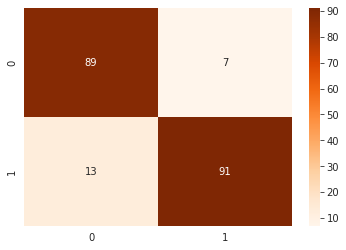

In [55]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap='Oranges', fmt='.4g');

#### Continuation little recap on evaluation metrics

**Precision**: how many times our model is correct when predicting the positive class (1). $TP/(TP+FP) = 91/(91+7)=0.9286$

**Recall**: how many times the model predicts the positive class (1) when it really is positive. $TP/(TP+FN) = 91/(91+13)=0.875$

**F1**: harmonic mean of precision and recall.  

(....)

Little parentesis, you can also get the test accuracy by using the slightly different code below. Just note that the parameters are different

In [56]:
log_reg.score(X_test, y_test)

0.9

Let's also store this accuracy for later.

In [57]:
a1=log_reg.score(X_test, y_test)

### Apply Standardisation

One way to improve results is to try to apply standardisation.
You can do so by applying the ScandardScaler from Scikit-learn. This will transform your X features so that they each have a mean of 0 and a standard deviation of 1. 

Standardisation is helpful to give the same weight (importance) to each predictor variable.

***Important: do not forget that you must fit your scaler on the train set only, then apply (transform) to both the train and test data***

In [58]:
# instantiate
scaler = StandardScaler()
# fit on train set only
scaler.fit(X_train, y_train)

# apply to the train set and your test

X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [59]:
# to check that indeed the scaled X_train has mean 0 and standard deviation 1 (approximately)
pd.DataFrame(X_train_s, columns=X_train.columns).describe().round()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,city_label,country_label
count,800.0,800.0,800.0,800.0,800.0,800.0,800.0
mean,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.0,-2.0,-3.0,-2.0,-1.0,-2.0,-2.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
50%,0.0,-0.0,0.0,0.0,-1.0,-0.0,-0.0
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,2.0,3.0,2.0,2.0,1.0,2.0,2.0


In [60]:
log_reg_s = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=0)

log_reg_s.fit(X_train_s, y_train)

y_pred_s = log_reg_s.predict(X_test_s)

# preformance measurement
evaluate(y_test, y_pred_s)

CONFUSION MATRIX:
[[91  5]
 [ 5 99]]
ACCURACY SCORE:
0.9500
CLASSIFICATION REPORT:
	Precision: 0.9519
	Recall: 0.9519
	F1_Score: 0.9519


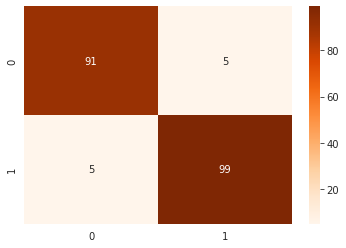

In [61]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred_s)), annot=True, cmap='Oranges', fmt='.4g');

There is no doubt, our model is better with standardisation. It has above all higher recall 

In [62]:
a2=log_reg_s.score(X_test_s, y_test)

### Use Cross-Validation

Still on our quest to improve our model. We will try to apply both standardisation and cross-validation to check our test accuracy.

We will use a 5-fold cross-validation by setting the `cv` parameter to 5.

In [63]:
# instantiate
log_reg_s_c = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000)

# fit
log_reg_s_c.fit(X_train_s, y_train)

#make predictions on the standardised test set
y_pred_s_c=log_reg_s_c.predict(X_test_s)

# preformance measurement
evaluate(y_test, y_pred_s_c)


CONFUSION MATRIX:
[[92  4]
 [ 5 99]]
ACCURACY SCORE:
0.9550
CLASSIFICATION REPORT:
	Precision: 0.9612
	Recall: 0.9519
	F1_Score: 0.9565


In [64]:
# store this value for later
a3=log_reg_s_c.score(X_test_s, y_test)

###What about Regularization?

The Logistic Regression classifier uses one by default. You can use the C parameter to check this out. C is the inverse of the regularization strength. Here below we use a very small C, which means strong regularisation. As a result the accuracy drops a little.

In [65]:
# instantiate
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000, C=0.002)

# fit
log_reg.fit(X_train_s, y_train)

#make predictions on the standardised test set
y_pred=log_reg.predict(X_test_s)

# preformance measurement
evaluate(y_test, y_pred)

CONFUSION MATRIX:
[[96  0]
 [11 93]]
ACCURACY SCORE:
0.9450
CLASSIFICATION REPORT:
	Precision: 1.0000
	Recall: 0.8942
	F1_Score: 0.9442


There is a similar parameters you can use to control regularisation for the LogisticRegressionCV. This time `Cs` is a list of floats chosen in a logarithmic scale between 1e-4 and 1e+4. As before, smaller values specify stronger regularisation.

In [66]:
# instantiate
log_reg = LogisticRegressionCV(solver='lbfgs', max_iter=1000, Cs=np.logspace(start=-4, stop=4, num=50))

# fit
log_reg.fit(X_train_s, y_train)

#make predictions on the standardised test set
y_pred=log_reg.predict(X_test_s)

# preformance measurement
evaluate(y_test, y_pred)

CONFUSION MATRIX:
[[92  4]
 [ 5 99]]
ACCURACY SCORE:
0.9550
CLASSIFICATION REPORT:
	Precision: 0.9612
	Recall: 0.9519
	F1_Score: 0.9565


In [67]:
# this is the generated list of 50 C's
log_reg.Cs_

array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-02, 8.68511374e-02, 1.26485522e-01,
       1.84206997e-01, 2.68269580e-01, 3.90693994e-01, 5.68986603e-01,
       8.28642773e-01, 1.20679264e+00, 1.75751062e+00, 2.55954792e+00,
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04])

In [68]:
# this is the best regularisation parameter
log_reg.C_

array([0.184207])

#### Accuracy improvements

Plot all your results.

In [69]:
results = pd.DataFrame({'base_rate': baseline, 'logreg': a1, 
                        'logreg std': a2, 'logreg std cv': a3
                        }, index=[0])
results

,base_rate,logreg,logreg std,logreg std cv
0,0.48,0.9,0.95,0.955


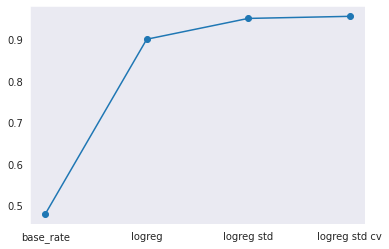

In [70]:
plt.plot(results.iloc[0], marker='o')

##3. Multi-class Classification

What happens when we have more than 2 labels in our target vector?
We'll briefly go over it using the IRIS dataset, in which we classify flowers into three kinds of flowers.

### Brief Recap on the theory

You use Softmax regression. This is a generalization of logistics regression to multiple classes. The model fits one linear regression for each class, and then transforms their output into probabilities using the Softmax function.

In [72]:
# load the data
from sklearn import datasets

iris=datasets.load_iris()

#select only the first two features
X = iris.data[:, :2]

y = iris.target

#show first 10 instances of X
X[:10]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1]])

In [73]:
# check out how many classes we have in y
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

In [74]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [75]:
# Fit model
log_reg = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegressionCV(cv=5, max_iter=1000)

In [76]:
log_reg.score(X_test, y_test)
# accuracy_score(log_reg.predict(X_test), y_test)

0.8333333333333334

In [77]:
# Predictions
log_reg.predict(X_test)

array([2, 0, 2, 0, 1, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0,
       1, 0, 1, 1, 2, 0, 1, 2])

In [78]:
log_reg.predict_proba(X_test)

array([[2.79276702e-02, 4.82059393e-01, 4.90012937e-01],
       [8.75034139e-01, 9.71683117e-02, 2.77975490e-02],
       [4.44958229e-04, 2.19829187e-01, 7.79725855e-01],
       [8.65964983e-01, 5.11324961e-02, 8.29025206e-02],
       [2.92406748e-02, 5.26031369e-01, 4.44727956e-01],
       [9.81777116e-04, 1.71818447e-01, 8.27199776e-01],
       [9.29624479e-01, 4.01736833e-02, 3.02018373e-02],
       [6.75032397e-01, 2.63179707e-01, 6.17878964e-02],
       [3.26454125e-02, 4.17111618e-01, 5.50242969e-01],
       [7.24874223e-01, 2.27233073e-01, 4.78927035e-02],
       [8.45104986e-01, 1.11987825e-01, 4.29071894e-02],
       [6.43059762e-02, 3.93194969e-01, 5.42499055e-01],
       [8.11202753e-01, 1.39337132e-01, 4.94601144e-02],
       [7.23216057e-01, 1.92151290e-01, 8.46326528e-02],
       [1.88274801e-02, 3.72100383e-01, 6.09072137e-01],
       [5.80673755e-02, 4.99899774e-01, 4.42032851e-01],
       [2.02002492e-02, 6.91211289e-01, 2.88588462e-01],
       [1.88274801e-02, 3.72100

In [79]:
# Create DateFrame with probabilities, predictions, and true classes in test set
iris_LR_summary = pd.DataFrame(np.round(log_reg.predict_proba(X_test), 2), columns=["p(0)", "p(1)", "p(2)"])
iris_LR_summary["Prediction"] = log_reg.predict(X_test)
iris_LR_summary["True Class"] = y_test
iris_LR_summary

,p(0),p(1),p(2),Prediction,True Class
0,0.03,0.48,0.49,2,2
1,0.88,0.10,0.03,0,0
2,0.00,0.22,0.78,2,2
3,0.87,0.05,0.08,0,0
4,0.03,0.53,0.44,1,2
5,0.00,0.17,0.83,2,2
6,0.93,0.04,0.03,0,0
7,0.68,0.26,0.06,0,0
8,0.03,0.42,0.55,2,2
9,0.72,0.23,0.05,0,0


In [81]:
# Confusion matrix - 5 errors out of 30 points
confusion_matrix(y_test, log_reg.predict(X_test))

array([[11,  0,  0],
       [ 0,  4,  2],
       [ 0,  3, 10]])

Confusion matrix, without normalization


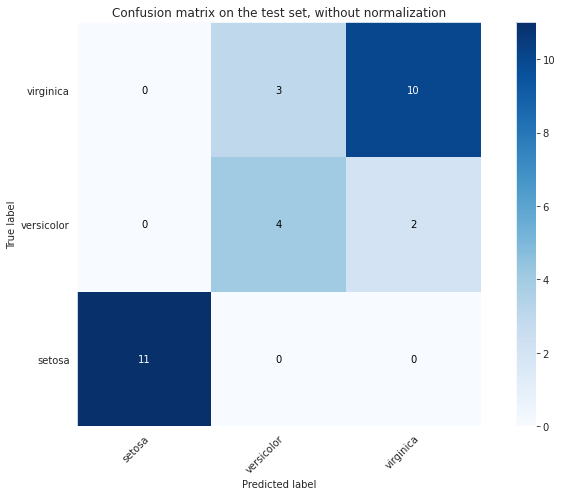

In [83]:
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(10,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    plt.ylim([-0.5, 2.5])

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout();
    return ax

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, log_reg.predict(X_test), classes=iris.target_names,
                      title='Confusion matrix on the test set, without normalization')

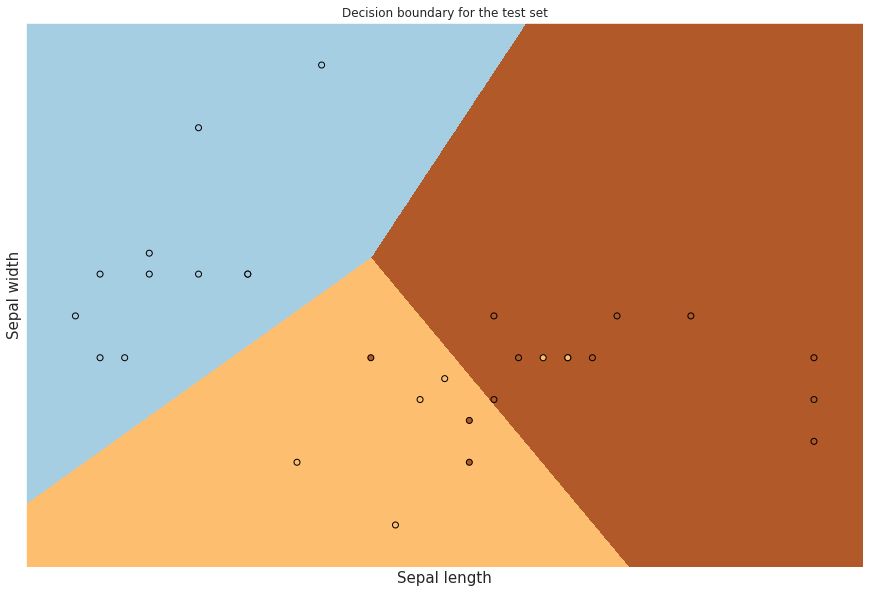

In [84]:
# Plot the decision boundaries for test set. For that, we will assign a 
# color to each point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_test[:, 0].min() - .2, X_test[:, 0].max() + .2
y_min, y_max = X_test[:, 1].min() - .2, X_test[:, 1].max() + .2
h = .001  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(15, 10))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length', fontsize=15)
plt.ylabel('Sepal width', fontsize=15)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Decision boundary for the test set')

plt.show()

Confusion matrix, without normalization


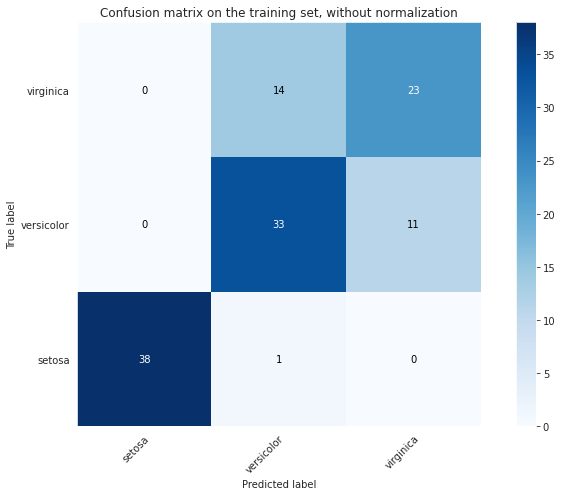

In [85]:
# confusion matrix - training set

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_train, log_reg.predict(X_train), classes=iris.target_names,
                      title='Confusion matrix on the training set, without normalization')

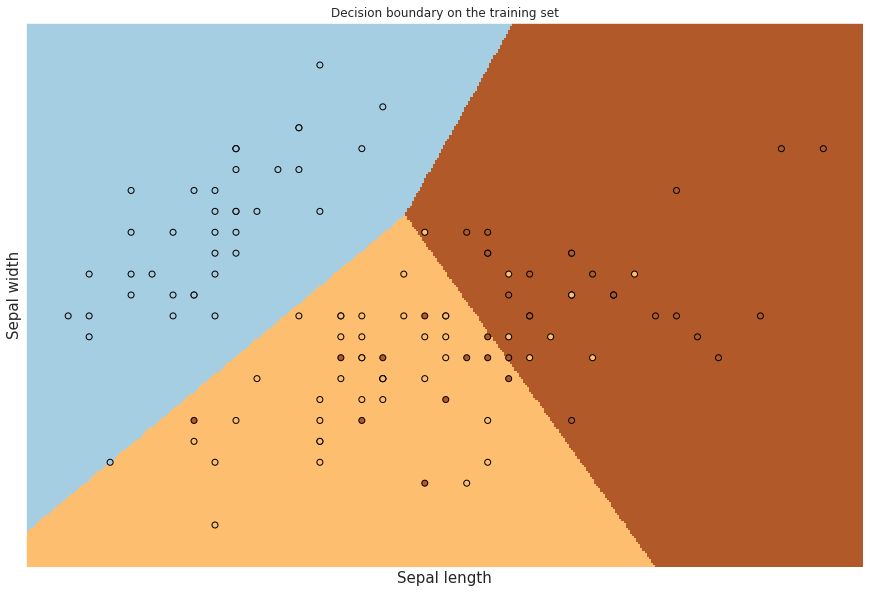

In [86]:
# Plot the decision boundaries for training set. For that, we will assign a 
# color to each point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train[:, 0].min() - .2, X_train[:, 0].max() + .2
y_min, y_max = X_train[:, 1].min() - .2, X_train[:, 1].max() + .2
h = .01  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(15, 10))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length', fontsize=15)
plt.ylabel('Sepal width', fontsize=15)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Decision boundary on the training set')

plt.show()


## References:
[Scikit Learn Library](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)   
[Logistic Regression for Machine Learning by Jason Brownlee PhD](https://machinelearningmastery.com/logistic-regression-for-machine-learning/)  
  